
estudar diferenças entre quem é aprovado na tabela e quem tem credit history.

criar historinha

fazer testes estatísticos para ver diferenças e igualdades.

investigar o contraste com o credity history -> pivot table

#### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Source
https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook



### Importing libraries e dataset

In [5]:
%pwd

'/Users/Cesar-mac/Desktop/Projeto_analise_credito/main/notebooks/edas'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import itertools

from scipy import stats
# A few helper functions:
from scipy.stats import mannwhitneyu, normaltest
from scipy.stats import chisquare

from pylab import *



train_df = pd.read_csv('../../datasets/raw/train_u6lujuX_CVtuZ9i.csv')
train_df['Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df['Income_after_payment'] = train_df['Income'] - train_df['LoanAmount']/train_df['Loan_Amount_Term'] 
train_df['First_Income_after_payment'] = train_df['ApplicantIncome'] - train_df['LoanAmount']/train_df['Loan_Amount_Term']


selecao = (train_df['Loan_Status'] == 'Y')
train_aproved = train_df[selecao]

selecao = (train_df['Loan_Status'] == 'N')
train_reproved = train_df[selecao]

selecao = (train_aproved['Credit_History'] == 0)
loan_aproved_no_history = train_aproved[selecao]
loan_aproved_with_history = train_aproved[~selecao]

selecao = (train_reproved['Credit_History'] == 1)
loan_reproved_with_history = train_reproved[selecao]
loan_reproved_no_history = train_reproved[~selecao]

train_df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Income_after_payment,First_Income_after_payment
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y,3612.0,3611.763889,2213.763889
558,LP002798,Male,Yes,0,Graduate,No,3887,2669.0,162.0,360.0,1.0,Semiurban,Y,6556.0,6555.550000,3886.550000
94,LP001325,Male,No,0,Not Graduate,No,3620,0.0,25.0,120.0,1.0,Semiurban,Y,3620.0,3619.791667,3619.791667
434,LP002390,Male,No,0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban,Y,3750.0,3749.722222,3749.722222
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y,7100.0,7097.916667,7097.916667


### Bar Plots para Credit History e para Loan Approved

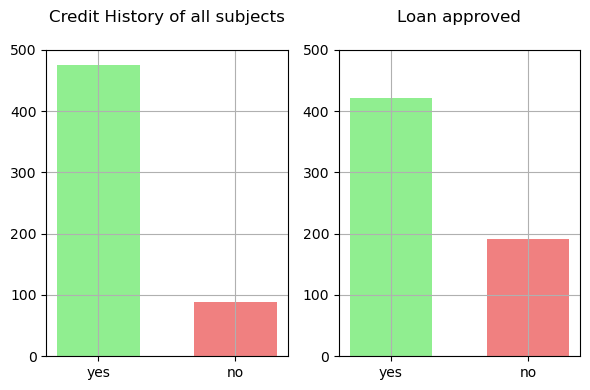

In [3]:
# Credit history aproved vs non aproved
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), layout='tight')

train_df1 = train_df[['Loan_Status','Credit_History']].copy()
train_df1['Credit_History'] = train_df1['Credit_History'].replace([0, 1], ['no', 'yes'])
train_df1['Loan_Status'] = train_df1['Loan_Status'].replace(['N', 'Y'], ['no', 'yes'])

ax61 = train_df1.Credit_History.value_counts(sort=True).index
# ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = train_df1.Credit_History.value_counts(sort=True)
ax1.bar(ax61,ax62,color=['lightgreen', 'lightcoral'],width=0.6)
ax1.set_title('Credit History of all subjects', pad=20)
ax1.set_ylim([0, 500])
ax1.grid()


ax61 = train_df1.Loan_Status.value_counts(sort=True).index
# ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = train_df1.Loan_Status.value_counts(sort=True)
ax2.bar(ax61,ax62,color=['lightgreen', 'lightcoral'],width=0.6)
ax2.set_title('Loan approved', pad=20)
ax2.set_ylim([0, 500])
ax2.grid()

# sujeitos aprovados vs sujeitos reprovados por credit history

In [4]:
from sklearn import metrics

train_df2 = train_df[['Loan_Status','Credit_History']].copy()

train_df2['Loan_Status'] = train_df2['Loan_Status'].replace([ 'yes','no'],[0,1]).copy()
train_df2['Credit_History'] = train_df2['Credit_History'].replace([ 'yes','no'],[0,1]).copy()
cm = metrics.confusion_matrix(train_df2.Loan_Status, train_df2.Credit_History)

plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Credit History');ax.set_ylabel('Loan Status'); 
ax.set_title('Load Status vs Credit History'); 
ax.xaxis.set_ticklabels(['With', 'Without']); ax.yaxis.set_ticklabels(['Approved', 'Reproved']);

ValueError: Input y_pred contains NaN.

### Distribuiçao das variáveis financeiras

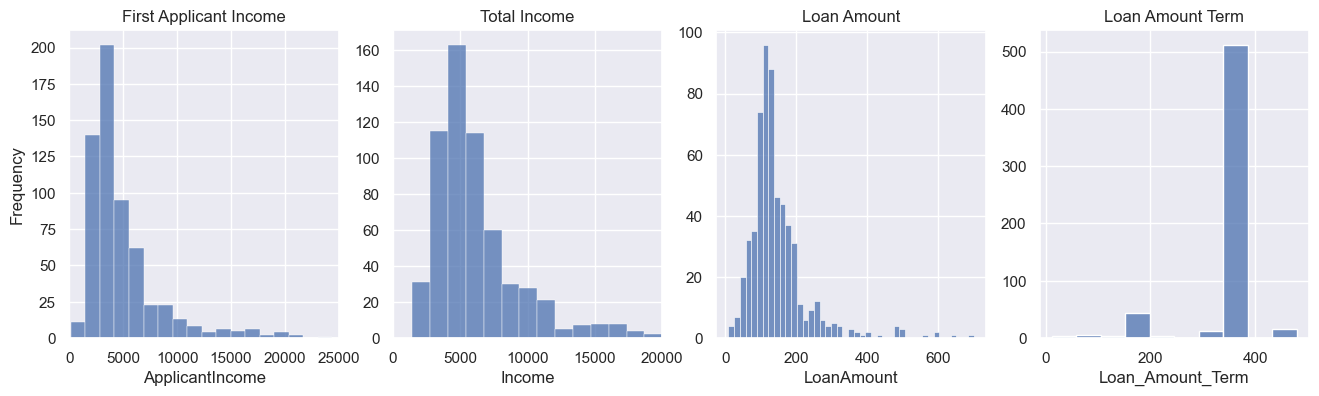

In [10]:

sns.set(rc={"figure.figsize": (16, 4)}) 

subplot(1,4,1)
ax = sns.histplot(train_df.ApplicantIncome,bins=60)
ax.set_xlim([0, 25000])
ax.set_ylabel('Frequency')
ax.set_title('First Applicant Income')

subplot(1,4,2)
ax = sns.histplot(train_df.Income,bins=60)
ax.set_xlim([0, 20000])
ax.set_ylabel('')
ax.set_title('Total Income')

subplot(1,4,3)
ax = sns.histplot(train_df.LoanAmount)
ax.set_ylabel('')
ax.set_title('Loan Amount')

subplot(1,4,4)
ax = sns.histplot(train_df.Loan_Amount_Term, bins = 10)
ax.set_ylabel('')
ax.set_title('Loan Amount Term')

plt.show()


### Distribuição de distribuição de empréstimo em ralação ao Credit History

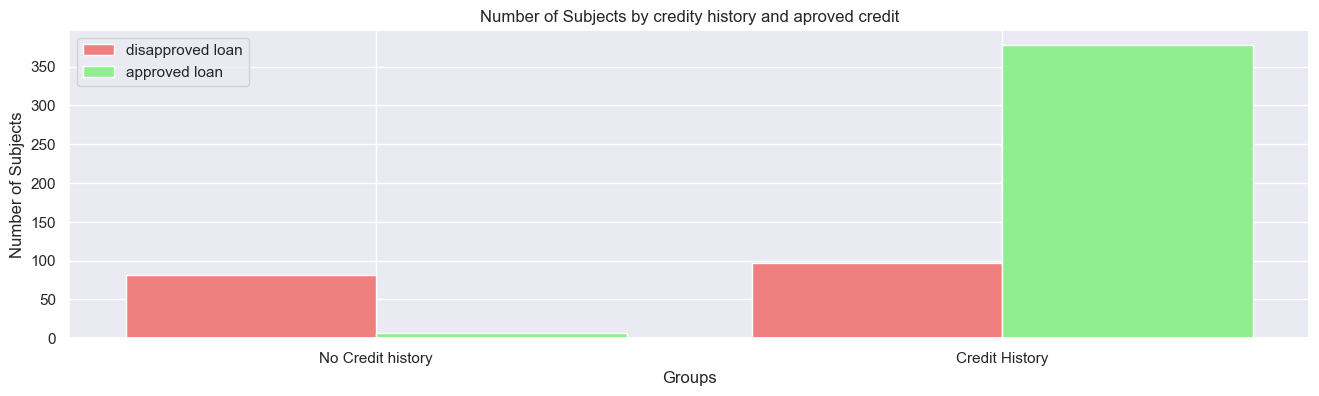

In [11]:
X = ['No Credit history','Credit History']
loan_approved = [loan_aproved_no_history.Credit_History.value_counts(sort=True).values[0],loan_aproved_with_history.Credit_History.value_counts(sort=True).values[0]]
loan_reproved = [loan_reproved_no_history.Credit_History.value_counts(sort=True).values[0],loan_reproved_with_history.Credit_History.value_counts(sort=True).values[0]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, loan_reproved, 0.4, label = 'disapproved loan',color=['lightcoral', 'lightcoral'])
plt.bar(X_axis + 0.2, loan_approved, 0.4, label = 'approved loan',color=['lightgreen', 'lightgreen'])

plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Subjects")
plt.title("Number of Subjects by credity history and aproved credit")
plt.legend()
plt.show()


#### Podemos observar que a maioria dos sujeitos tem histórico de crédito, e que os sujeitos com histórico de crédito tem mais chance de serem aprovados

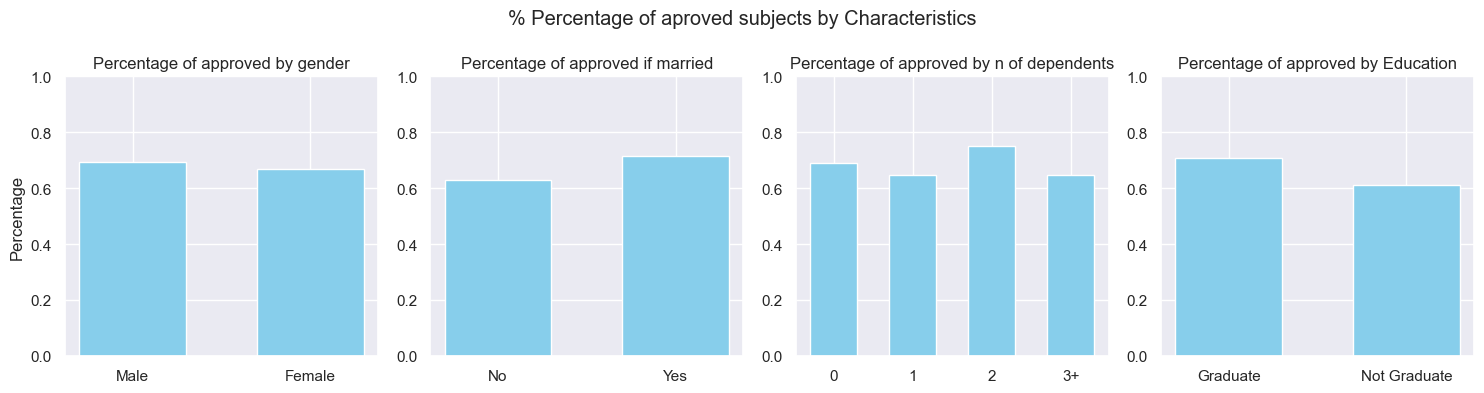

In [12]:
fig, (ax1, ax2, ax3, ax4)  = plt.subplots(1, 4, figsize=(15, 4), layout='tight')
fig.suptitle('% Percentage of aproved subjects by Characteristics')   

train_percentage_of_approved = train_aproved.Gender.value_counts(sort=False)/train_df.Gender.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax1.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax1.set_ylabel('Percentage')
ax1.set_title('Percentage of approved by gender')
ax1.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Married.value_counts(sort=False)/train_df.Married.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax2.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax2.set_title('Percentage of approved if married')
ax2.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Dependents.value_counts(sort=False)/train_df.Dependents.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax3.bar(ax11,ax12, color=['skyblue', 'skyblue','skyblue', 'skyblue'],width=0.6)
ax3.set_title('Percentage of approved by n of dependents')
ax3.set_ylim([0, 1])

train_percentage_of_approved = train_aproved.Education.value_counts(sort=False)/train_df.Education.value_counts(sort=False)
ax11 = train_percentage_of_approved.index
ax12 = train_percentage_of_approved
ax4.bar(ax11,ax12, color=['skyblue', 'skyblue'],width=0.6)
ax4.set_title('Percentage of approved by Education')
ax4.set_ylim([0, 1]);


#### Podemos observar porcentagem de aprovação dos sujeitos por alguns fatores. por gênero, se casado, número de dependentes e se possui graduação

### <font color='red'>Teste de diferença entre a proporçao de </font> homens e mulheres <font color='red'>aprovados </font>

In [33]:
Qnt = train_df.Gender.value_counts(sort=False)
Apro = train_aproved.Gender.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved


F_Observada = [Apro[0], Apro[1]]
F_Esperada = [AproM[0], AproM[1]]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1


In [24]:
F_Observada

[134, 285]

In [34]:
chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(f'o p-valor é {p_valor}')

o p-valor é 0.785975210572115


In [35]:
print(f'O valor está dentro da significância? {p_valor <= significancia}')

O valor está dentro da significância? False


##### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar a hipótese nula ($H_0$) e concluímos que as frequências observadas estão dentro das possibilidades, ou seja, a porcentagem de aceitação é similar entre homem e mulheres.</font>
---

### <font color='red'>Teste de diferença entre a proporçao de</font> casados e solteiros  <font color='red'> aprovados</font>

In [26]:
from scipy.stats import chisquare

In [27]:
Qnt = train_df.Married.value_counts(sort=False)
Apro = train_aproved.Married.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved


F_Observada = [Apro[0], Apro[1]]
F_Esperada = [AproM[0], AproM[1]]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1


In [31]:
p_valor

0.21604882016899007

In [28]:
chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(f'o p-valor é {p_valor}')

o p-valor é 0.21604882016899007


In [ ]:
print(f'O valor está dentro da significância? {p_valor <= significancia}')

O valor está dentro da significância? False


##### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar a hipótese nula ($H_0$) e concluímos que as frequências observadas estão dentro das possibilidades, ou seja, a porcentagem de aceitação é similar entre casados e solteiros.</font>
---

### <font color='red'>Teste de diferença entre a proporçao de</font> graduados e não-graduados <font color='red'> aprovados</font>

In [ ]:
Qnt = train_df.Education.value_counts(sort=False)
Apro = train_aproved.Education.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved


F_Observada = [Apro[0], Apro[1]]
F_Esperada = [AproM[0], AproM[1]]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1


In [ ]:
chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(f'o p-valor é {p_valor}')

o p-valor é 0.2340297156727919


In [ ]:
print(f'O valor está dentro da significância? {p_valor <= significancia}')

O valor está dentro da significância? False


##### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar a hipótese nula ($H_0$) e concluímos que as frequências observadas estão dentro das possibilidades, ou seja, a porcentagem de aceitação é similar entre casados e solteiros.</font>
---

### <font color='red'>Teste de diferença entre a proporçao de</font> graduados e não-graduados <font color='red'> aprovados</font>

In [ ]:
Qnt = train_df.Credit_History.value_counts(sort=False)
Apro = train_aproved.Credit_History.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved


F_Observada = [Apro[0], Apro[1]]
F_Esperada = [AproM[0], AproM[1]]
significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1


In [ ]:
chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)
print(f'o p-valor é {p_valor}')

o p-valor é 0.0


In [ ]:
print(f'O valor está dentro da significância? {p_valor <= significancia}')

O valor está dentro da significância? True


##### <font color='green'>Conclusão: Com um nível de confiança de 95% podemos rejeitar a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a porcentagem de aceitação entre sujeitos com histórico de crédito e sem histórico de crédito é diferente.</font>
---

Criação da nova variável referente a condição mensal dos solicitantes de crédito a pagarem a divida:

Renda_apos_pagamento = Renda_total_dos_solicitantes - Valor_total_do_emprestimo/Em_quantos_meses_será_pago 

In [ ]:
#train_df['Income_after_payment'] = train_df['Income'] - train_df['LoanAmount']/train_df['Loan_Amount_Term']

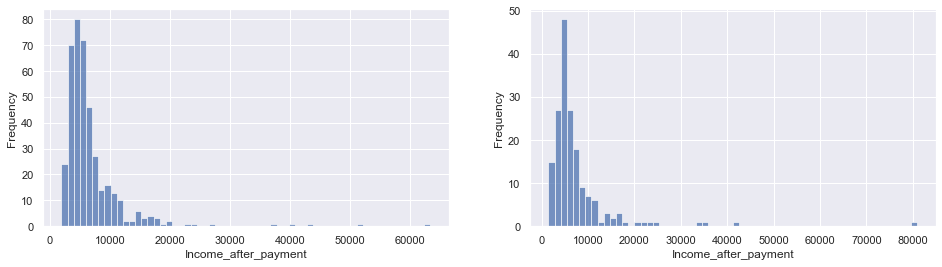

In [ ]:


sns.set(rc={"figure.figsize": (16, 4)}) 

subplot(1,2,1)
ax = sns.histplot(train_aproved.Income_after_payment,bins=60)
#ax.set_xlim([0, 25000])
ax.set_ylabel('Frequency')
#ax.set_title('First Applicant Income')

subplot(1,2,2)
ax = sns.histplot(train_reproved.Income_after_payment,bins=60)
#ax.set_xlim([0, 20000])
ax.set_ylabel('Frequency')
#ax.set_title('Total Income')

plt.show()


(0.0, 20000.0)

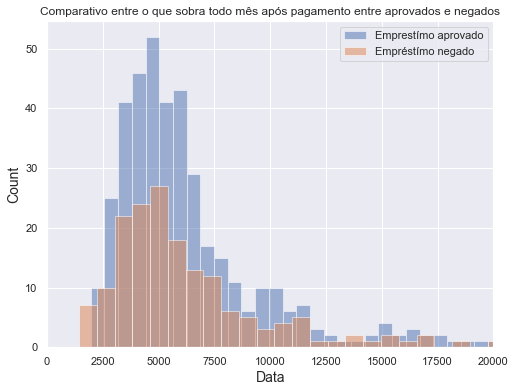

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(train_aproved.Income_after_payment, bins=100, alpha=0.5, label="Emprestímo aprovado")
plt.hist(train_reproved.Income_after_payment, bins=100, alpha=0.5, label="Empréstímo negado")


plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparativo entre o que sobra todo mês após pagamento entre aprovados e negados")
plt.legend(loc='upper right')
plt.savefig("overlapping_histograms_with_matplotlib_Python.png")
plt.xlim([0, 20000])

In [ ]:
train_reproved

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Income_after_payment,First_Income_after_payment
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,6090.644444,4582.644444
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0,5539.561111,3035.561111
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0,23808.030556,12840.030556
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,4693.0,4692.683333,1852.683333
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,3510.0,3509.788889,3509.788889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,LP002941,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N,7383.0,7382.480556,6382.480556
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N,2987.0,2986.755556,2986.755556
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,42083.0,42081.055556,414.055556
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N,6200.0,NaN,NaN


(-2000.0, 30000.0)

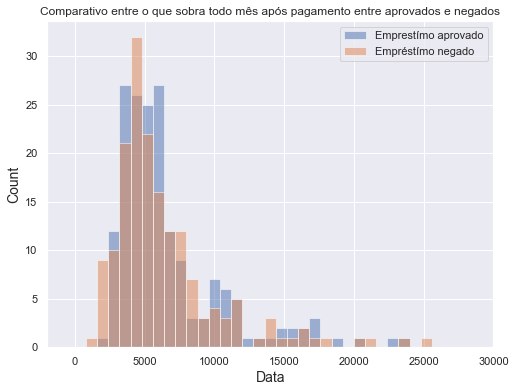

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(train_aproved.sample(train_reproved.shape[0]).Income_after_payment, bins=np.arange(0, 30000 + 800, 800), alpha=0.5, label="Emprestímo aprovado")
plt.hist(train_reproved.Income_after_payment, bins=np.arange(0, 30000 + 800, 800), alpha=0.5, label="Empréstímo negado")


plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparativo entre o que sobra todo mês após pagamento entre aprovados e negados")
plt.legend(loc='upper right')
plt.xlim([-2000, 30000])

### Comparando quem teve empréstimo aprovado em relação a renda após pagamento e total de empréstimo

In [ ]:
table = pd.pivot_table(train_df, values=['LoanAmount', 'Income'], index=['Credit_History', 'Loan_Status'],
                    aggfunc={'LoanAmount': np.mean,
                             'Income': [min, max, np.mean]})
table

Income                        LoanAmount
                                max          mean     min        mean
Credit_History Loan_Status                                           
0.0            N            81000.0   6877.560976  1830.0  141.371795
               Y            39999.0  11252.000000  4917.0  206.285714
1.0            N            35673.0   7400.371134  1442.0  155.604396
               Y            63337.0   6840.431005  1963.0  142.103542

#### Através do pivot table podemos observar que a média e o mínimo da renda de quem foi aprovado para empréstimo sem ter histórico de crédito é superior as demais categorias.

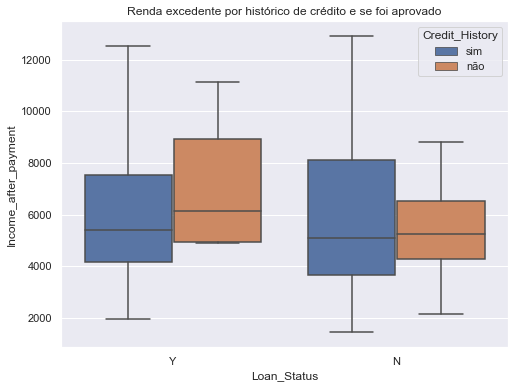

In [ ]:
sns.boxplot(data=train_df, 
            y="Income_after_payment", x="Loan_Status",hue='Credit_History', sym='').set(
    title='Renda excedente por histórico de crédito e se foi aprovado')
sns.set(rc={'figure.figsize':(6,4)})

#### Conseguimos observar que a distribuição entre os que tiveram o empréstimo aprovado sem ter histórico de crédito, tem uma rende excedente acima de 5000. Enquanto aproximadamente a metade dos que tiveram emprestimo negado e não tem histórico de crédito tem uma renda excedente igual ou abaixo de 5000

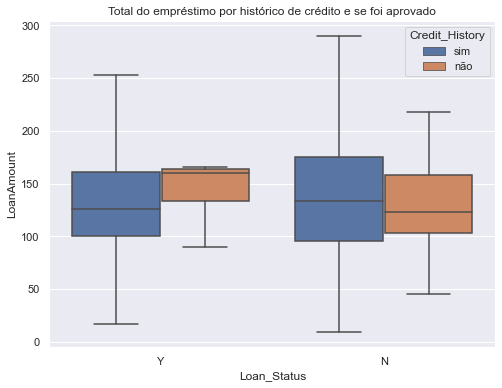

In [ ]:
sns.boxplot(data=train_df, y="LoanAmount", 
            x="Loan_Status",hue='Credit_History', sym='').set(
    title='Total do empréstimo por histórico de crédito e se foi aprovado')
sns.set(rc={'figure.figsize':(8,6)})

#### Conseguimos observar que a distribuição entre os que tiveram o empréstimo aprovado sem ter histórico de crédito, tem um valor de emprestímo inferior a 170.000.

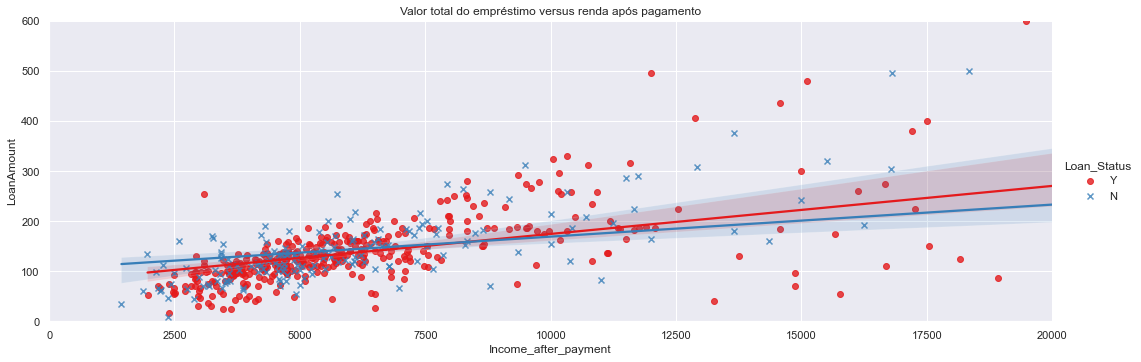

In [ ]:

g = sns.lmplot(x="Income_after_payment", y="LoanAmount", hue="Loan_Status", data=train_df,
           markers=["o", "x"], palette="Set1",height=5, aspect=3)
g.set(xlim=(0, 20000))
g.set(ylim=(0, 600))
g.set(title='Valor total do empréstimo versus renda após pagamento')